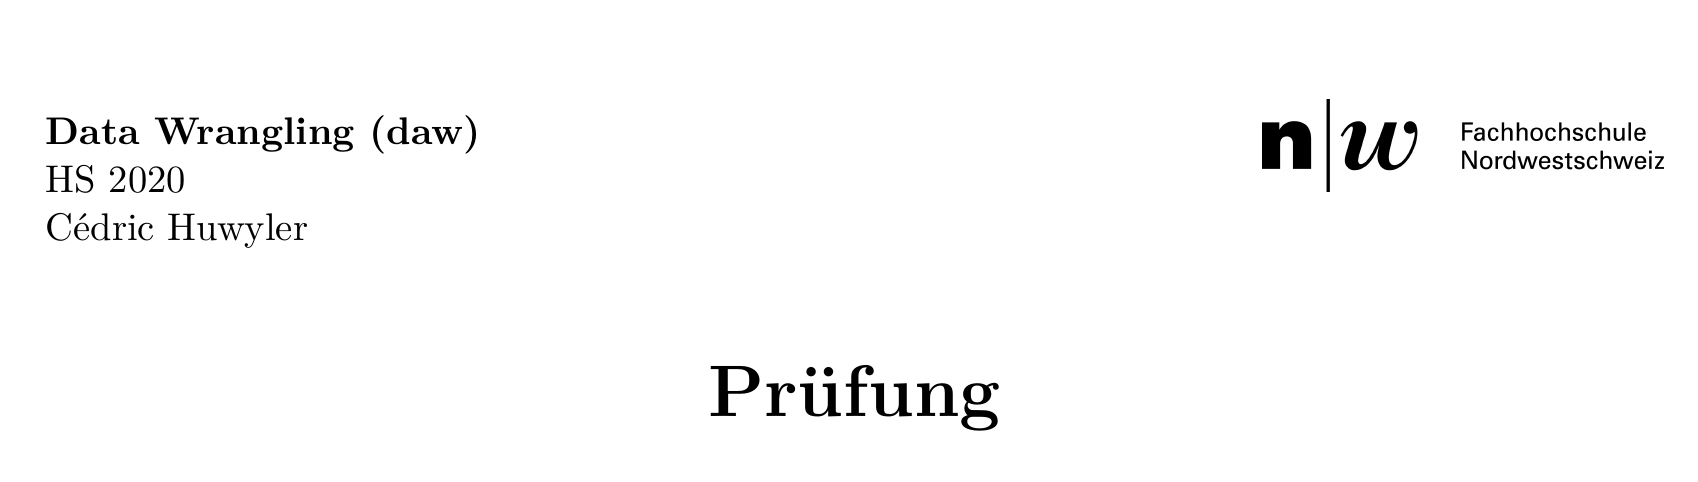

Versionsinfo über Pandas, Numpy und Scikit-Learn:

In [1]:
import pandas as pd
import numpy as np
import sklearn
print("Pandas {}".format(pd.__version__))
print("Numpy {}".format(np.__version__))
print("Scikit-Learn {}".format(sklearn.__version__))

Pandas 1.2.4
Numpy 1.18.4
Scikit-Learn 0.23.1


## Aufgabe 1: Data Wrangling Basics (27 Punkte)

In der Datei `'tips.csv'` finden Sie einen Datensatz mit Erhebungen einer Bar. Darin enthalten sind pro Tisch: totaler Rechnungsbetrag, Trinkgeldbetrag, Angabe Raucher/Nicht-Raucher, Wochentag, Tageszeit und Gruppengrösse.

### a) (1 Punkt)

Importieren Sie das Datenset in ein Data Frame.

In [39]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [40]:
tips.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
dtype: object

### b) (6 Punkte)

Beschreiben Sie die Datentypen der verschiedenen Merkmale: Welche sind diskret und welche stetig? Welche der Merkmale davon sind nominal-, ordinal-, intervall- und welche verhältnisskaliert? 

total_bill = stetig, verhältnisskaliert

tip = stetig, verhältnisskaliert

smoker = diskret, nominalskaliert

day = diskret, intervallskaliert

time = diskret, intervallskaliert

size = diskret, intervallskaliert


### c) (2 Punkte)

Geben Sie ein Beispiel eines stetigen, aber nicht verhältnisskalierten Merkmals an und erklären Sie kurz:

Wenn ein Merkmal keinen klaren Nullpunkt hat und somit kein Verhältnis gebildet werden kann. z.b. Temperatur in Celsius, da kann nicht gesagt werden das 20 Grad doppelt so warm ist wie 10 Grad, da der wahre Nullpunkt nicht bei 0 Grad liegt

### d) (6 Punkte)

Zurück zum erstellten Data Frame. Formatieren Sie die diskreten Variablen wo nötig als *kategorische* Variablen. Dabei soll die Variable im resultierenden Data Frame über die verschiedenen Ausprägungen des Merkmals Bescheid wissen und wo möglich auch die Bedeutung der Ordnungsrelationen $<$ und $>$ verstehen können.

In [43]:
# changing a single value
tips['smoker'] = tips['smoker'].astype('category')
# changeing multiple values
tips = tips.astype({'smoker': 'category', 'day':'category','time':'category','size':'category'})

#define order
tips['day'] = tips['day'].cat.set_categories(["Thur", "Fri", "Sat", "Sun"], ordered=True)
tips['time'] = tips['time'].cat.set_categories(["Lunch", "Dinner"], ordered=True)
tips['size'] = tips['size'].cat.set_categories([1,2,3,4,5,6], ordered=True)

### e) (6 Punkte)

An welchem Wochentag nahm die Bar durchschnittlich prozentual am meisten Trinkgeld ein? Gib ein informatives Data Frame aus und unterlege deine Antwort mit einem Barplot. Die Wochentage sollen dabei in der korrekten Reihenfolge angeordnet sein.

In [63]:
tips_days = tips.groupby('day').agg({"tip": "sum"})[['tip']].apply(lambda x: 100*x /float(x.sum()))
tips_days

,tip
day,
Thur,23.487520
Fri,7.102436
Sat,35.594193
Sun,33.815851


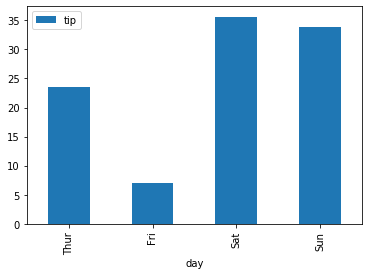

In [64]:
tips_days.plot.bar()

### f) (6 Punkte)

Wie hängt die prozentuale Trinkgeldhöhe qualitativ mit der Gruppengrösse zusammen? Beurteilen Sie mit einem Boxplot der Trinkgeldhöhe pro Gruppengrösse (alle Boxplots in einem Plot). Geben Sie zur Sicherheit auch die Verteilung der Gruppengrössen an - spielt diese bei Ihrer Beurteilung eine Rolle?

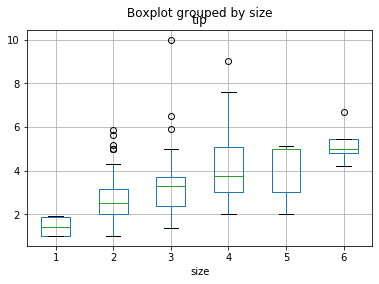

In [84]:
tips.boxplot(column='tip', by='size')

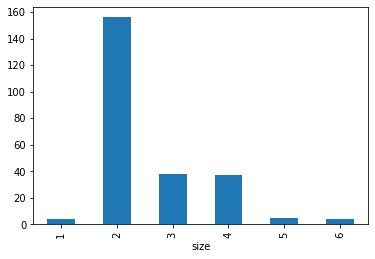

In [77]:
# Verteilung der Gruppengrösse
tips.groupby('size').size().plot.bar()

## Aufgabe 2: Diabetes-Risiko (27 Punkte)

In den zur Verfügung gestellten Dateien finden Sie die Excel-Datei `'diabetes.xlsx'` mit einem Datenset und einer Beschreibung dazu in den verschiedenen Sheets.

### a) (1 Punkt)

Lesen Sie die Beschreibung und importieren Sie das Datenset in ein Data Frame.

In [2]:
data = pd.read_excel('diabetes.xlsx', sheet_name='data')

### b) (7 Punkte)

Enthält das Datenset fehlende Werte? Untersuchen Sie die Wertebereiche der einzelnen Spalten genau. Stellen Sie sicher, dass alle klar erkennbaren fehlenden Werte mit `NaN` auch als solche gekennzeichnet sind. Geben Sie die Anzahl der fehlenden Werte pro Spalte absolut und in Prozent aus.

In [26]:
cols_with_zero = ['gtt','blood_pressure','bmi','triceps_skin_fold_thickness']
for col in cols_with_zero:
    data[col] = data[col].replace(0,np.nan)

In [32]:
for col in data.columns:
    perc = 100 / data[col].count() * data[col].isnull().sum()
    print(col,perc)

n_pregnant 0.0
gtt 0.6561679790026247
blood_pressure 4.781420765027323
triceps_skin_fold_thickness 42.03703703703704
insulin 0.0
bmi 1.455026455026455
dpf 0.0
age 0.0
class 0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa079770b20>,
      dtype=object)

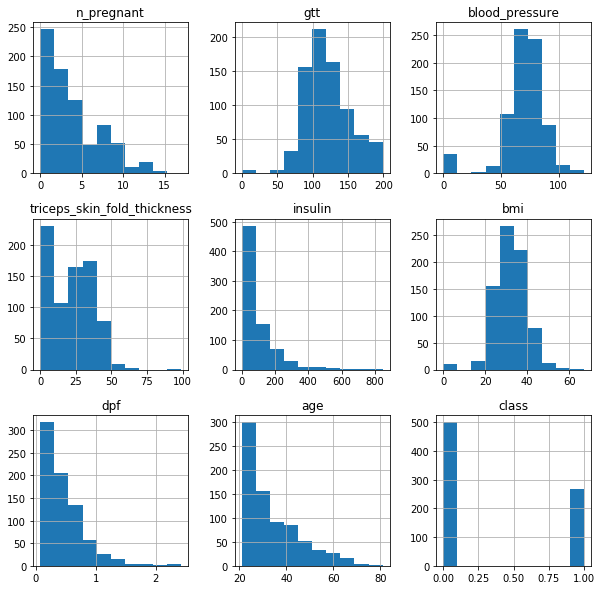

In [25]:
data.hist(figsize=(10,10))

### c) (1 Punkt)

Erklären Sie kurz, warum wir hier das komplette Entfernen der Samples mit fehlenden Werten vermeiden möchten und lieber eine passende Imputationsstrategie wählen.

*Hier ist eine schriftliche Antwort erwartet*

### d) (7 Punkte)

Erstellen Sie ein neues Data Frame und wenden Sie folgenden Strategien an:

* `gtt` und `triceps_skin_fold_thickness`: Imputation mit Median
* `blood_pressure` und `bmi`: Imputation mit Durchschnitt

Stellen Sie am Schluss sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

In [39]:
data['triceps_skin_fold_thickness'] = data['triceps_skin_fold_thickness'].replace(np.nan,data['triceps_skin_fold_thickness'].median())

In [41]:
data.isnull().any()

n_pregnant                     False
gtt                            False
blood_pressure                  True
triceps_skin_fold_thickness    False
insulin                        False
bmi                             True
dpf                            False
age                            False
class                          False
dtype: bool

### e) (4 Punkte)

Alternativ können fehlende Werte auch modellbasiert ersetzt werden. Dazu soll ein *k nearest neighbours* (KNN) - Modell verwendet werden (mit `n_neighbours=5`). Verwenden Sie dazu die Klasse `sklearn.impute.KNNImputer` von Scikit-Learn.

Stellen Sie auch hier sicher, dass im neuen Data Frame keine fehlenden Werte mehr vorkommen.

**Hinweis:** Natürlich sollte die Variable \texttt{class} nicht als Grundlage zur Imputation benutzt werden, da sonst Information darüber in die unabhängigen Variablen leakt.

AttributeError: module 'sklearn' has no attribute 'impute'

### f) (7 Punkte)

Wir möchten zum Schluss auf dem imputierten Datenset aus Teilaufgabe (e) untersuchen, ob und wie stark Fettleibigkeit zum Diabetesrisiko beiträgt. Erstellen Sie dazu eine neue Spalte `bmi_class` mit der folgenden Einteilung:

$$
\text{bmi_class} = \left\{ \begin{array}{ll}
\text{'underweight'}, & \text{bmi} < 18.5 \\
\text{'normal'}, & 18.5 \leq \text{bmi} < 25 \\
\text{'overweight'}, & 25 \leq \text{bmi} < 30 \\
\text{'obese'}, & \text{bmi} \geq 30 
\end{array}\right.
$$

Die Spalte soll über die Ordinalskala der BMI-Klasse informiert sein.

Berechnen Sie nun das mittlere Diabetesrisiko und die Anzahl der Probanden pro BMI-Klasse. Was ist Ihre Schlussfolgerung?

In [47]:
data['bmi_class'] = pd.cut(x=data['bmi'], bins=[0,18.5,25,30,100], labels=['underweight','normal','overweight','obese'])



In [57]:
data.groupby('bmi_class')['class'].value_counts()

bmi_class    class
underweight  0          4
normal       0        101
             1          7
overweight   0        136
             1         44
obese        0        250
             1        214
Name: class, dtype: int64

## Aufgabe 3: Hierarchisch strukturierte Daten (21 Punkte)

Das *Gapminder*-Datenset enthält Daten zum Bruttoinlandprodukt (BIP) pro Kopf (engl. GDP per capita), zur Lebenserwartung (eng. life expectancy) und zur Bevölkerungsgrösse (engl. population) von 142 Ländern auf 5 Kontinenten.

In `gapminder.json` finden Sie ein verschachteltes JSON-Datenset. Dabei ist das oberste Hierarchielevel der Kontinent, das zweitoberste das Land und die relevanten Grössen finden sich schliesslich in der dritten Hierarchiestufe.

### a) (9 Punkte)

Lesen Sie das Json-File als Dictionary ein und bringen Sie es in die Form eines flachen Data Frames:

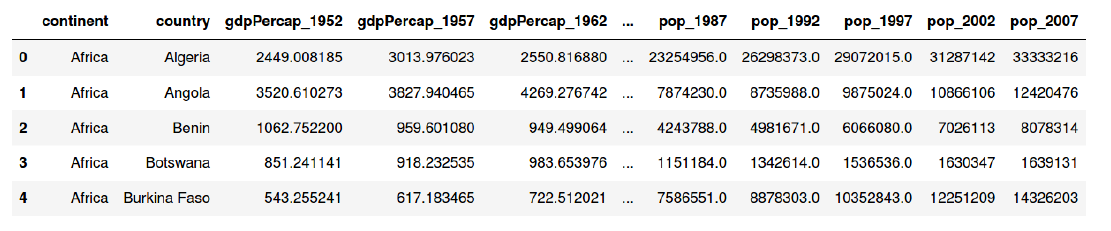

**Hinweis:** Das geht zum Beispiel mit zwei verschachtelten `for`-Loops.

In [71]:
df = pd.read_json('gapminder.json')
df.reset_index(inplace=True)
df = df.rename(columns={'index':'Country'})
df = df.melt('Country')
df = df.dropna()

In [75]:
pd.json_normalize(df.iloc[0].value).melt()

,variable,value
0,gdpPercap_1952,2.449008e+03
1,gdpPercap_1957,3.013976e+03
2,gdpPercap_1962,2.550817e+03
3,gdpPercap_1967,3.246992e+03
4,gdpPercap_1972,4.182664e+03
5,gdpPercap_1977,4.910417e+03
6,gdpPercap_1982,5.745160e+03
7,gdpPercap_1987,5.681359e+03
8,gdpPercap_1992,5.023217e+03
9,gdpPercap_1997,4.797295e+03


### b) (9 Punkte)

Bringen Sie nun das Data Frame in die folgende Form:

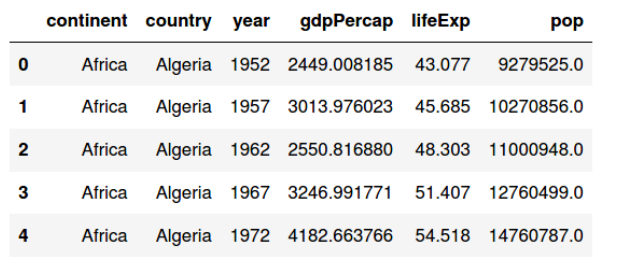

### c) (3 Punkte)

Stellen Sie die Entwicklung der durchschnittlichen Lebenserwartung pro Kontinent graphsich dar. Gewichten Sie in der Berechnung des Durchschnitts nach Bevölkerungsgrösse pro Land.